<div align="right"><img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" height="200px" width="25%"></div>

<h1 style="text-align: left; color: #2e6c80;">Actividad Grupal – Análisis e Interpretación de Datos </h1>

<p>
<b>Profesor:</b>  Gustavo Fontana Riera <br>
<b>Fecha de entrega:</b>  05/05/2025 <br>
<b>Alumnos: <br>
    </b>- Erika Samara Alvares Angelim <br>
    </b>- Laila<br>
    </b>- Rocío <br>
    </b>- Joel<br>
    </b>- Pepe<br>
</p>

---

## ✔️Instalar las bibliotecas necesarias

In [21]:
# Instalar librerías necesarias para el análisis de datos y la visualización

# Primero verifica si las librerías de Ciencias de Datos estan todas instaladas y si no, las instalan
import importlib
import subprocess
import sys

def install_if_missing(package_name, import_name=None):
    try:
        importlib.import_module(import_name or package_name)
        print(f"✅ {package_name} ya está instalado.")
    except ImportError:
        print(f"⬇️ Instalando {package_name}...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

# Lista de paquetes a verificar
packages = {
    "numpy": "numpy",
    "matplotlib": "matplotlib",
    "pandas": "pandas",
    "seaborn": "seaborn",
    "scikit-learn": "sklearn",
    "statsmodels": "statsmodels",
    "plotly.express": "plotly.express",
    "imblearn": "imblearn",
    "mord": "mord",
}
for pkg, import_name in packages.items():
    install_if_missing(pkg, import_name)
print("✅ Todas las librerías necesarias están instaladas.")


#Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas.plotting import parallel_coordinates



from sklearn.exceptions import NotFittedError
from sklearn.preprocessing import OrdinalEncoder, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, BaggingClassifier, VotingClassifier, StackingClassifier,  GradientBoostingRegressor
import mord


from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
from itertools import cycle
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    make_scorer,
    get_scorer,
    roc_curve,
    auc,
    mean_absolute_error)



# Biblioteca para manejar las advertencias en Python
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo de visualización
sns.set_theme(style="ticks", palette="deep")

print("\n--- ✅ Librerías Importadas con Exito ---")

✅ numpy ya está instalado.
✅ matplotlib ya está instalado.
✅ pandas ya está instalado.
✅ seaborn ya está instalado.
✅ scikit-learn ya está instalado.
✅ statsmodels ya está instalado.
✅ plotly.express ya está instalado.
✅ imblearn ya está instalado.
✅ mord ya está instalado.
✅ Todas las librerías necesarias están instaladas.

--- ✅ Librerías Importadas con Exito ---


## Importar librerías

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


## ✔️Configurar el entorno

In [23]:
import warnings
warnings.filterwarnings("ignore")

# Mostrar todas las columnas sin truncamiento
pd.set_option('display.max_columns', None)       # Muestra todas las columnas
pd.set_option('display.max_rows', None)          # Muestra todas las filas

pd.options.display.float_format = '{:.8f}'.format
#pd.set_option('display.width', 1000)


# Ocultar warnings
warnings.filterwarnings('ignore')

# Ajustar el ancho del contenedor de Jupyter/Colab:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Configuración general de gráficos
sns.set(style="whitegrid") # plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 6)



#plt.style.use('fivethirtyeight')
#plt.rcParams['figure.figsize'] = (10, 6)

https://raw.githubusercontent.com/ea-analisisdatos/unir/refs/heads/main/datos/2024-TourismDashboard-Indicators-Export-csv.csv

Fuentes de datos:
- https://ec.europa.eu/eurostat/web/nuts?etrans=es
- https://data.jrc.ec.europa.eu/dataset/9564824a-7f16-4efa-82fb-d4e176350026

## Cargar el Dataset

In [24]:

# URL del archivo CSV
url = "https://raw.githubusercontent.com/ea-analisisdatos/unir/refs/heads/main/datos/2024-TourismDashboard-Indicators-Export-Spain.csv"

# Cargar el CSV en un DataFrame
df_turismo = pd.read_csv(url)

# Vista previa
df_turismo.head()


,pillar,code,indicator,component,year,nuts_code_2021,unit,value
0,Basic descriptors,TOUR_DES_01,Nights spent,Night spent,2019,ES,number,469813551.00000000
1,Basic descriptors,TOUR_DES_01,Nights spent,Night spent,2020,ES,number,144677028.00000000
2,Basic descriptors,TOUR_DES_01,Nights spent,Night spent,2021,ES,number,259579759.00000000
3,Basic descriptors,TOUR_DES_01,Nights spent,Night spent,2022,ES,number,451624940.00000000
4,Basic descriptors,TOUR_DES_01,Nights spent,Night spent,2023,ES,number,484987485.00000000


In [25]:
df_turismo.tail()

,pillar,code,indicator,component,year,nuts_code_2021,unit,value
4521,Socio-economic pillar,TOUR_SOE_11,Tourism enterprises by size,Small Enterprises,2019,ES,%,2.10000000
4522,Socio-economic pillar,TOUR_SOE_11,Tourism enterprises by size,Small Enterprises,2020,ES,%,1.70000000
4523,Socio-economic pillar,TOUR_SOE_11,Tourism enterprises by size,Small Enterprises,2021,ES,%,1.50000000
4524,Socio-economic pillar,TOUR_SOE_11,Tourism enterprises by size,Small Enterprises,2022,ES,%,1.70000000
4525,Socio-economic pillar,TOUR_SOE_11,Tourism enterprises by size,Small Enterprises,2023,ES,%,2.90000000


In [26]:
# CUIDADO con datasets grandes
# si hay muchas columnas y muchas filas el pairplot puede tardar bastante
df_turismo = df_turismo.sample(100) # toma una muestra de forma aleatoria
df_turismo.head()

,pillar,code,indicator,component,year,nuts_code_2021,unit,value
1663,Basic descriptors,TOUR_DES_09,Progress of tourism demand recovery,Progress of tourism recovery,2020,ES,%,30.79000000
2990,Green pillar,TOUR_ENV_05,Excellent bathing water,Excellent bathing water,2023,ES21,%,88.71000000
391,Basic descriptors,TOUR_DES_01,Nights spent,Night spent,2020,ES709,number,10260271.00000000
4337,Socio-economic pillar,TOUR_SOE_04,Tourism diversity,Tourism diversity,2023,ES11,index,0.74360000
2418,Basic descriptors,TOUR_DES_12,Share of protected/designated land,Protected land,2020,ES432,%,36.09000000


## 📊 Análisis multivariado:

En el archivo que estamos trabajando (2024-TourismDashboard-Indicators-Export-Spain.csv), hay columnas como:

- indicator: nombre general del indicador (ej. Tourism demand, Tourism economy, etc.)
- component: una subdivisión o dimensión específica del indicador (ej. Number of nights, GDP, etc.)
- unit: la unidad de medida (ej. percentage, million euros, nights, etc.)
- value: el dato numérico que representa la combinación indicator + component + unit + region + year.

Por tanto:

- La columna value no tiene una única escala ni una única interpretación.
- La clave está en que el campo value solo tiene sentido cuando lo contextualizas con indicator, component y unit. 
- ⚠️ Ignorar esto puede llevarte a gráficos sin sentido, errores de interpretación o conclusiones inválidas.

Tipo de Gráficas para hacer el Análisis Multivariado:
- Correlación (matriz de correlación y mapa de calor)
- Análisis de Componentes Principales (PCA)
- Gráficos de dispersión múltiple (pairplot)
- Gráfico paralelo (parallel_coordinates)
- Gráfico de radar (si aplica)
- Agrupación por categorías (boxplot por regiones o años, etc.)

📋 Exploración inicial del dataset

In [32]:
# Verificar estructura
df_turismo.info()

# Estadísticas descriptivas
df_turismo.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1663 to 2636
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pillar           100 non-null    object        
 1   code             100 non-null    object        
 2   indicator        100 non-null    object        
 3   component        100 non-null    object        
 4   year             100 non-null    datetime64[ns]
 5   nuts_code_2021   100 non-null    object        
 6   unit             100 non-null    object        
 7   value            100 non-null    float64       
 8   clave_indicador  100 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 7.8+ KB


,pillar,code,indicator,component,year,nuts_code_2021,unit,value,clave_indicador
count,100,100,100,100,100,100,100,100.00000000,100
unique,4,21,21,22,NaN,53,10,NaN,22
top,Basic descriptors,TOUR_DES_10,Presence of Blue flag awarded sites,Presence blue flags,NaN,ES12,%,NaN,Presence of Blue flag awarded sites | Presence...
freq,59,12,12,12,NaN,5,41,NaN,12
mean,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002021,NaN,NaN,197593.43026000,NaN
min,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002019,NaN,NaN,0.00000000,NaN
25%,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002020,NaN,NaN,1.93245000,NaN
50%,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002021,NaN,NaN,29.84000000,NaN
75%,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002023,NaN,NaN,88.98000000,NaN
max,NaN,NaN,NaN,NaN,1970-01-01 00:00:00.000002024,NaN,NaN,10260271.00000000,NaN


In [34]:
# Verificar valores únicos por columna
df_turismo.nunique()


pillar              4
code               21
indicator          21
component          22
year                6
nuts_code_2021     53
unit               10
value              76
clave_indicador    22
dtype: int64

 ## Limpieza general del dataset (antes de dividir)

In [35]:
# Verificar nulos por columna
df_turismo.isnull().sum()

# Eliminar filas con valores nulos en columnas clave
df_turismo = df_turismo.dropna(subset=["indicator", "component", "unit", "value"])

# Asegurar que los valores numéricos sean float
df_turismo["value"] = pd.to_numeric(df_turismo["value"], errors="coerce")

# Convertir fechas si existe una columna de tiempo
if "year" in df_turismo.columns:
    df_turismo["year"] = pd.to_datetime(df_turismo["year"], errors="coerce")

# Verificar valores únicos
df_turismo[["indicator", "component", "unit"]].drop_duplicates()


,indicator,component,unit
1663,Progress of tourism demand recovery,Progress of tourism recovery,%
2990,Excellent bathing water,Excellent bathing water,%
391,Nights spent,Night spent,number
4337,Tourism diversity,Tourism diversity,index
2418,Share of protected/designated land,Protected land,%
927,Occupancy rate,Occupancy,%
4261,Tourism seasonality,Tourism seasonality,%
2694,UNESCO and European heritage sites,UNESCO,number
2745,Internet speed at tourism destinations,Internet speed at tourism destinations,%
1932,Presence of Blue flag awarded sites,Presence blue flags,number


## Crear clave para segmentar por indicadores/componentes/unidades

In [36]:
# Crear una clave única para identificar subconjuntos homogéneos
df_turismo["clave_indicador"] = (
    df_turismo["indicator"] + " | " + df_turismo["component"] + " | " + df_turismo["unit"]
)


## Crear subconjuntos de datos homogéneos

In [37]:
# Agrupar y guardar cada subconjunto en un diccionario
subconjuntos = {
    nombre: sub_df for nombre, sub_df in df_turismo.groupby("clave_indicador")
}

# Mostrar nombres de subconjuntos disponibles
list(subconjuntos.keys())[:10]


['Arrivals | Arrivals | number',
 'Average length of stay | Average duration of stay | no. days',
 'Cultural assets density | Cultural asset intensity | no. of cultural assets / 100km<sup>2</sup>',
 'Dominant tourism typology | Tourism Typology | categorical',
 'Environmental labels and schemes | EMAS | Number',
 'Environmental labels and schemes | Total | Number',
 'Excellent bathing water | Excellent bathing water | %',
 'Internet speed at tourism destinations | Internet speed at tourism destinations | %',
 'Nights spent | Night spent | number',
 'Occupancy rate | Occupancy | %']

In [44]:
# Mostrar todas las claves del diccionario subconjuntos
for clave in subconjuntos.keys():
    print(clave)

Arrivals | Arrivals | number
Average length of stay | Average duration of stay | no. days
Cultural assets density | Cultural asset intensity | no. of cultural assets / 100km<sup>2</sup>
Dominant tourism typology | Tourism Typology | categorical
Environmental labels and schemes | EMAS | Number
Environmental labels and schemes | Total | Number
Excellent bathing water | Excellent bathing water | %
Internet speed at tourism destinations | Internet speed at tourism destinations | %
Nights spent | Night spent | number
Occupancy rate | Occupancy | %
Presence of Blue flag awarded sites | Presence blue flags | number
Progress of tourism demand recovery | Progress of tourism recovery | %
Share of accommodations in areas with high-nature value | High nature based tourism potential | %
Share of foreign tourists | Share of foreign tourists | %
Share of protected/designated land | Protected land | %
Tourism capacity | Tourism capacity (nr. of beds) | number of beds
Tourism density | Tourism density 

### Seleccionar subconjunto para análisis multivariado

In [ ]:
# Seleccionar uno que tenga datos cuantitativos y consistentes
nombre_sub = "Arrivals | Arrivals | number"  # O cualquier otro desde la lista de subconjuntos arriba
df_analisis = subconjuntos[nombre_sub].copy()

# Mostrar los primeros valores
df_analisis.head()

,pillar,code,indicator,component,year,nuts_code_2021,unit,value,clave_indicador
408,Basic descriptors,TOUR_DES_02,Arrivals,Arrivals,1970-01-01 00:00:00.000002022,ES12,number,2432625.00000000,Arrivals | Arrivals | number


### Limpieza adicional por subconjunto

In [47]:
# Verificar columnas disponibles
df_analisis.columns

# Limpiar o renombrar si es necesario
df_analisis.rename(columns={"value": "valor"}, inplace=True)

# Revisar nulos o duplicados
df_analisis = df_analisis.dropna()
df_analisis = df_analisis.drop_duplicates()


### 📊  Análisis Multivariado con Visualizaciones

📌 Gráfico de dispersión con color por región o categoría

In [ ]:
# Asegurarse de que hay una variable de categoría (como region, year, etc.)
sns.scatterplot(
    data=df_analisis,
    x="year",
    y="valor",
    hue="NUTS2",  # ajusta si tu columna se llama diferente
    palette="viridis"
)
plt.title("Evolución del indicador GDP por región")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📌 Boxplot por región

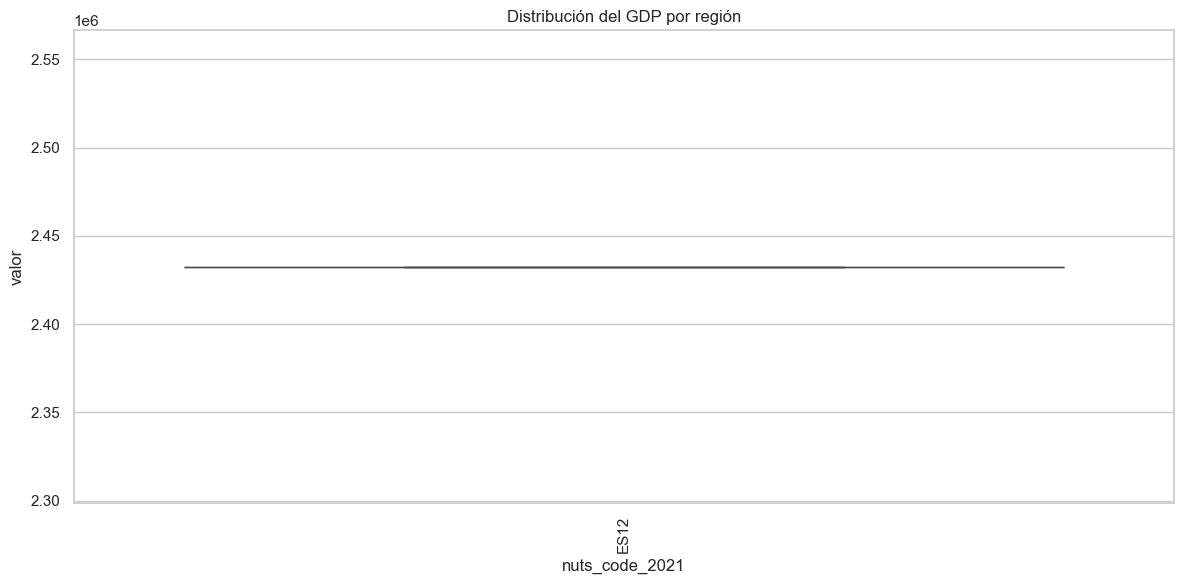

In [54]:
sns.boxplot(data=df_analisis, x="nuts_code_2021", y="valor")
plt.title("Distribución del GDP por región")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


📌 Heatmap de correlaciones (si hay más de una variable numérica)

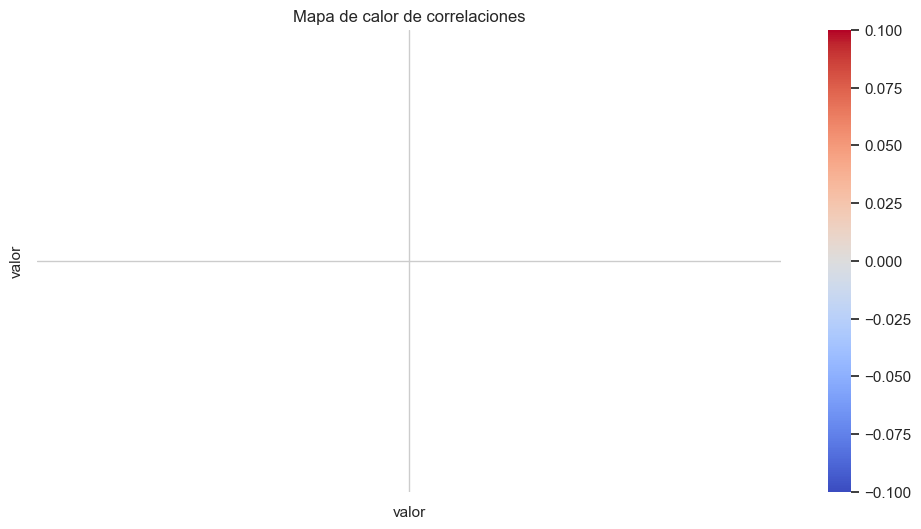

In [55]:
# Filtrar solo columnas numéricas
corr_df = df_analisis.select_dtypes(include=np.number)

# Calcular matriz de correlación
corr = corr_df.corr()

# Graficar heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()


📌 Pairplot para ver relaciones múltiples

KeyError: 'region'

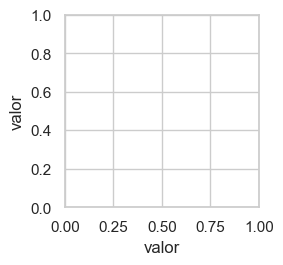

In [57]:
# Crear pairplot si hay al menos 3 columnas numéricas
sns.pairplot(df_analisis, hue="region")  # ajustar según tus columnas
plt.suptitle("Gráfica de pares por región", y=1.02)
plt.show()


📌 Series temporales

In [ ]:
# Graficar evolución temporal por región
sns.lineplot(data=df_analisis, x="year", y="valor", hue="region")
plt.title("Serie temporal del GDP por región")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##  Selección de subconjunto alternativo con unidad en porcentaje (%)

In [ ]:
# Filtrar subconjuntos donde la unidad es porcentaje
claves_porcentaje = [k for k in subconjuntos.keys() if "%" in k]

# Mostrar algunas opciones
claves_porcentaje[:5]


### Seleccionar un subconjunto basado en unidad en porcentaje

In [ ]:
# Seleccionar manualmente uno que tenga buena cobertura de datos
nombre_sub_pct = claves_porcentaje[0]  # puedes cambiar el índice por otro si lo deseas
df_analisis_pct = subconjuntos[nombre_sub_pct].copy()

# Mostrar info básica
df_analisis_pct.head()


### Limpieza del subconjunto porcentual

In [ ]:
# Renombrar valor
df_analisis_pct.rename(columns={"value": "valor"}, inplace=True)

# Eliminar nulos y duplicados
df_analisis_pct.dropna(inplace=True)
df_analisis_pct.drop_duplicates(inplace=True)


### 📊 Análisis multivariado del subconjunto porcentual

📌 Evolución temporal

In [ ]:
sns.lineplot(data=df_analisis_pct, x="year", y="valor", hue="region")
plt.title("Evolución del indicador en porcentaje por región")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📌 Boxplot por región

In [ ]:
sns.boxplot(data=df_analisis_pct, x="region", y="valor")
plt.title("Distribución del indicador porcentual por región")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


📌 Gráfico de dispersión coloreado por región

In [ ]:
sns.scatterplot(data=df_analisis_pct, x="year", y="valor", hue="region", palette="plasma")
plt.title("Dispersión del indicador porcentual")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


📌 Pairplot (si hay más columnas numéricas relevantes)

In [ ]:
sns.pairplot(df_analisis_pct, hue="region")
plt.suptitle("Análisis multivariado de porcentaje", y=1.02)
plt.show()


## Unión de subconjuntos por regiones comunes

In [ ]:
# Extraer las regiones comunes
regiones_comunes = set(df_analisis_millones["region"]).intersection(set(df_analisis_pct["region"]))
print(f"Número de regiones comunes: {len(regiones_comunes)}")

# Filtrar ambos subconjuntos por las regiones comunes
df_millones_comunes = df_analisis_millones[df_analisis_millones["region"].isin(regiones_comunes)]
df_pct_comunes = df_analisis_pct[df_analisis_pct["region"].isin(regiones_comunes)]

# Renombrar columnas valor para distinguirlas
df_millones_comunes = df_millones_comunes.rename(columns={"valor": "valor_millones"})
df_pct_comunes = df_pct_comunes.rename(columns={"valor": "valor_pct"})

# Unir ambos datasets por año y región
df_comparado = pd.merge(df_millones_comunes, df_pct_comunes, on=["region", "year"], how="inner")

# Mostrar ejemplo
df_comparado.head()


### Análisis comparativo multivariado entre ambos subconjuntos

📌 Gráfico conjunto: porcentaje vs millones

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_comparado, x="valor_millones", y="valor_pct", hue="region")
plt.title("Relación entre valor en millones y porcentaje por región y año")
plt.xlabel("Valor en millones")
plt.ylabel("Valor en porcentaje")
plt.tight_layout()
plt.show()


📌 Gráfico por año: comparación de escalas

In [ ]:
sns.lmplot(data=df_comparado, x="valor_millones", y="valor_pct", col="year", hue="region", col_wrap=4, height=4, aspect=1)
plt.suptitle("Comparación multivariada por año", y=1.02)
plt.show()


📌 correlación entre ambas variables

In [ ]:
correlacion = df_comparado["valor_millones"].corr(df_comparado["valor_pct"])
print(f"Correlación entre valores en millones y porcentaje: {correlacion:.2f}")


## 💾 Exportación de subconjuntos a archivos .csv

In [ ]:
# Guardar los tres subconjuntos
df_analisis_millones.to_csv("subconjunto_millones.csv", index=False)
df_analisis_pct.to_csv("subconjunto_porcentaje.csv", index=False)
df_comparado.to_csv("subconjunto_comparado.csv", index=False)
print("Archivos guardados correctamente.")


## Conclusión 

Tenemos: 

- Subconjuntos separados y analizados.
- Cruce por regiones comunes.
- Comparación visual y estadística multivariada.
- Exportación lista para informes o dashboard externos.